In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from environments.utils import create_data
import warnings
warnings.filterwarnings('ignore')

In [32]:
train, test = create_data(end_="2023-04-13")

In [33]:
with open('../fear_greed.json') as f:
    data = json.load(f)

In [34]:
fear = pd.DataFrame(data[0], columns=['index','value'],)
fear.index = pd.to_datetime(fear['index'])
fear  = fear.drop('index', axis=1)
fear['value'] = fear['value'].astype('float')

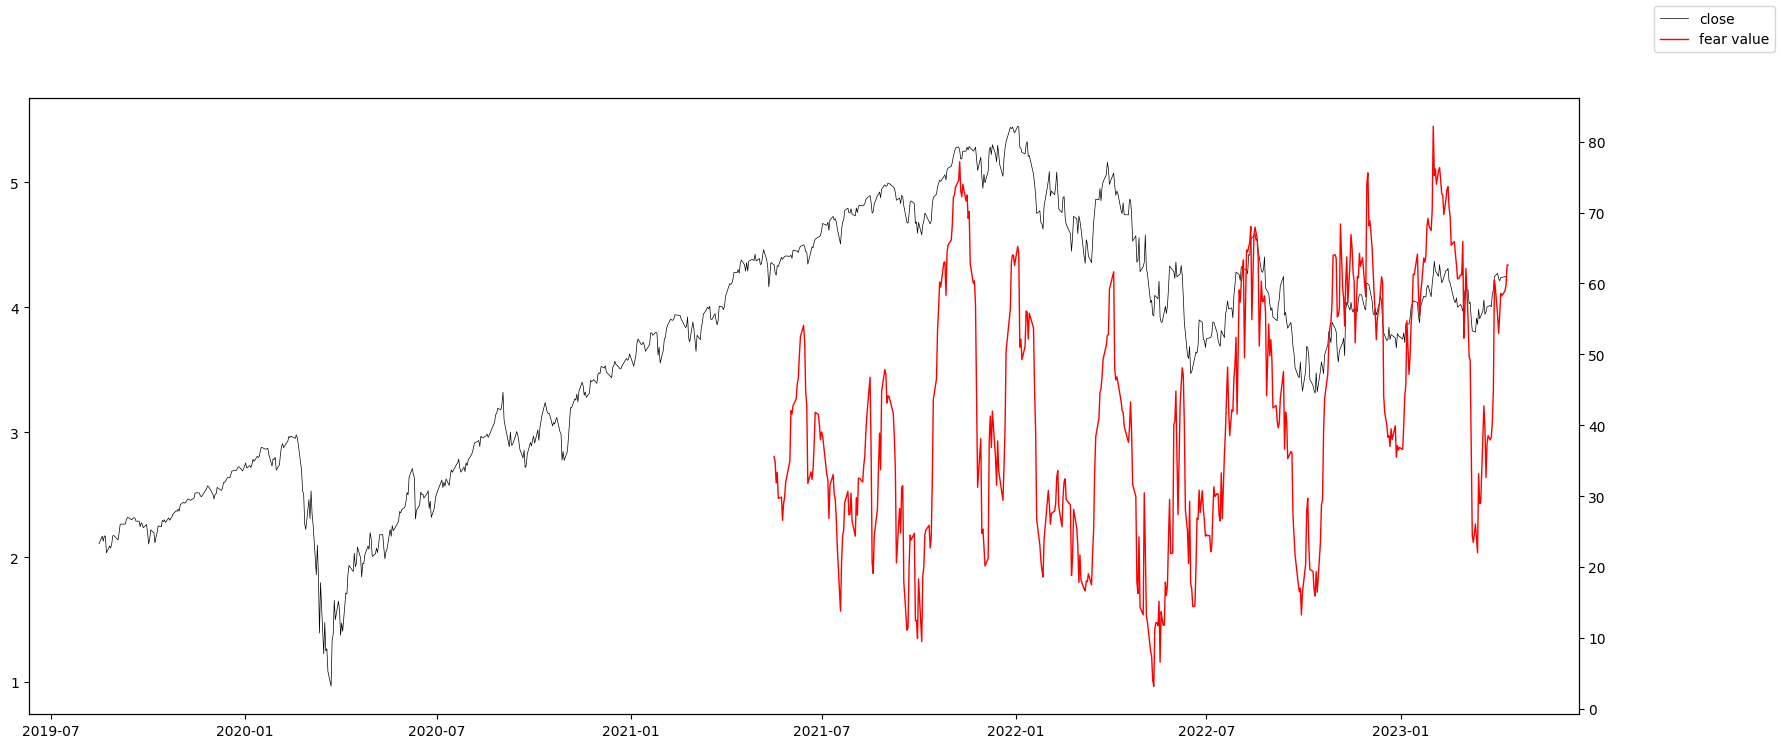

In [35]:
# plot close price and buy/sell signals
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

ax1.plot(test['close'], label='close', linewidth=0.5, color='black')

ax2.plot(fear['value'], label='fear value', linewidth=1, color='red')

fig.legend()
plt.show()


In [36]:
test = test.loc[fear.index[0]:fear.index[-1]]
fear = fear.loc[test.index]

In [37]:
cash = 1000
shares = 0
sell_threshold = 75
buy_threshold = 25
buying = []
selling = []
for i in range(len(fear)):
    if fear['value'].iloc[i] < buy_threshold:
        if shares == 0:
            print('cash: ', cash, 'shares: ', shares, 'price: ', test['close'].iloc[i], 'buying')
            shares = cash / test['close'].iloc[i]
            cash = 0
            buying.append(i)
    elif fear['value'].iloc[i] > sell_threshold:
        if shares > 0:
            print('cash: ', cash, 'shares: ', shares, 'price: ', test['close'].iloc[i], 'selling')
            cash = shares * test['close'].iloc[i]
            shares = 0
            selling.append(i)
# sell remaining shares
print(shares)
if shares > 0:
    print('cash: ', cash, 'shares: ', shares, 'price: ', test['close'].iloc[-1], 'selling')
    cash = shares * test['close'].iloc[-1]
    shares = 0
    selling.append(len(fear))
print(cash)
print('Made: ', (cash - 1000)/1000, '% in ', len(fear), 'days')
print('Annualized return: ', (cash - 1000)/1000 * 365 / len(fear), '%')

cash:  1000 shares:  0 price:  4.626885697266496 buying
cash:  0 shares:  216.12809682996644 price:  5.253950239209483 selling
cash:  1135.5262660396925 shares:  0 price:  5.046878233736671 buying
cash:  0 shares:  224.9957723269573 price:  4.188068005502268 selling
cash:  942.2975954558026 shares:  0 price:  3.8116085070484003 buying
247.2178330259554
cash:  0 shares:  247.2178330259554 price:  4.215000294533315 selling
1042.0232390182898
Made:  0.04202323901828981 % in  480 days
Annualized return:  0.031955171336824545 %


In [38]:
fear

,value
Date,
2021-05-17,35.6000
2021-05-18,34.8333
2021-05-19,31.8667
2021-05-20,33.3667
2021-05-21,29.7000
...,...
2023-04-05,55.6000
2023-04-06,58.6000
2023-04-10,58.9429


In [39]:
test

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,4.352069,4.334396,4.328681,4.339927,0.354066,2.176800,-0.116161,-0.305280,2.936029,-0.584658,...,-0.111684,4.328787,3.178904,4.354372,0.000000,1.000000,-0.299363,-0.954139,0.705584,-0.708627
2021-05-18,4.345099,4.329552,4.299387,4.277831,0.579272,2.168547,-0.205603,-0.390776,3.096629,-0.576298,...,-0.739094,4.316914,3.056327,4.341580,0.781831,0.623490,-0.485302,-0.874347,0.693281,-0.720667
2021-05-19,4.226915,4.238224,4.186102,4.256555,0.455000,2.176867,-0.189888,-0.502014,3.264369,-0.535931,...,-0.954067,4.302329,3.015766,4.325096,0.974928,-0.222521,-0.651372,-0.758758,0.680773,-0.732494
2021-05-20,4.268102,4.335935,4.292335,4.332624,0.233530,2.180636,-0.283929,-0.386715,3.405003,-0.550179,...,-0.185464,4.306335,3.151614,4.324724,0.433884,-0.900969,-0.790776,-0.612106,0.668064,-0.744104
2021-05-21,4.349775,4.363778,4.344521,4.326915,0.247029,2.174274,-0.399349,-0.399032,3.465236,-0.550917,...,-0.243150,4.312062,3.141376,4.323154,-0.433884,-0.900969,-0.897805,-0.440394,0.655156,-0.755493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05,4.219998,4.208072,4.205661,4.212251,0.224574,2.500994,-1.023475,2.208664,3.111371,0.463646,...,0.619904,4.193978,2.022647,4.147581,0.974928,-0.222521,0.848644,0.528964,0.997917,-0.064508
2023-04-06,4.196620,4.221416,4.200890,4.237888,-0.172344,2.507269,-1.008348,2.441107,2.963665,0.534314,...,0.808607,4.214326,2.062767,4.167304,0.433884,-0.900969,0.937752,0.347305,0.996659,-0.081676
2023-04-10,4.203712,4.225229,4.205644,4.245050,-0.224329,2.514144,-0.989523,2.459295,2.942876,0.494527,...,0.867139,4.230883,2.073772,4.195167,0.000000,1.000000,0.897805,-0.440394,0.988678,-0.150055
